In [20]:
# importing data and necessary lib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv("Example - Call Log.csv")
second_person = "User1"     #other person
first_person = "Manan"    #your name
print(type(df))



<class 'pandas.core.frame.DataFrame'>


In [21]:
# cleaning null values

# print(df.count())
df.dropna(inplace = True)
print(df.count())

df.head(1)

Name         162
Address      162
Direction    162
Status       162
Duration     162
Date         162
dtype: int64


,Name,Address,Direction,Status,Duration,Date
0,User1,123,Incoming,Answered,00:29,13-06-2019 (05:33:37)


In [22]:
def toNumber(t):
    mins,sec = t.split(':')
    duration_sec = int(mins)*60 + int(sec)
    return duration_sec
    
def getDateTimeObject(date_time_string):
    date, time = date_time_string.split(' ')
    time = time.replace('(',' ')
    time = time.replace(')','')
    date_time_object = datetime.datetime.strptime(date+time,'%d-%m-%Y %H:%M:%S')
    return date_time_object

def dateFilter(record_date="",from_date="",to_date=""):
    if(from_date==""):
        from_date = datetime.datetime.strptime('01-01-1900 01:01:01','%d-%m-%Y %H:%M:%S')
    if(to_date == ""):
        to_date = datetime.datetime.now()
        
    if(from_date <= record_date <= to_date):
        return True
        
    else:
        return False


In [23]:
#adding new derieved columns


# call_duration column
call_duration = [toNumber(i) for i in df['Duration'].tolist()]
df['Duration_sec'] = pd.Series(call_duration,index=df.index)
# df.insert(3,'Dur',call_duration,True)


# date time object column
df['DateO']  = [getDateTimeObject(i) for i in df['Date'].tolist()]

df.head()
# df = df.drop('Dur',axis=1)

,Name,Address,Direction,Status,Duration,Date,Duration_sec,DateO
0,User1,123,Incoming,Answered,00:29,13-06-2019 (05:33:37),29,2019-06-13 05:33:37
1,User1,123,Incoming,Missed,00:00,14-06-2019 (08:59:46),0,2019-06-14 08:59:46
2,User1,123,Incoming,Answered,02:35,24-06-2019 (20:32:06),155,2019-06-24 20:32:06
3,User1,123,Incoming,Answered,01:29,25-06-2019 (07:36:56),89,2019-06-25 07:36:56
4,User1,123,Incoming,Missed,00:00,02-07-2019 (11:55:51),0,2019-07-02 11:55:51


In [24]:
#function to plot pie chart for 2 options
# analysis_type = 1 | "call_analysis"         ->> call analysis
# analysis_type = 2 | "missed_call_analysis"  ->> missed call analysis
def plotPie(analysis_type="1",label=["label1","label2"],title="Title",legend="",from_date="",to_date=""):
    person1 = 0
    person2 = 0
    if(analysis_type == "1" or analysis_type=="call_analysis"):
        option1 = "Incoming"
        option2 = "Outgoing"
        column_index = 3
    else:
        option1 = "Missed"
        option2 = "Unanswered"
        column_index = 4


    for i in df.itertuples():
        temp = i[column_index]
        record_date = i[8]
        if(temp  == option1 and dateFilter(record_date,from_date,to_date)):
            person1 += 1
        elif(temp  == option2 and dateFilter(record_date)):
            person2 += 1
    plot_list = [person1,person2]

    _,_,autotexts = plt.pie(plot_list,labels=label,explode=[0.1,0],autopct='%1.1f%%')
    for autotext in autotexts:
        autotext.set_color('white')
    plt.title(title)
    if(legend != ""):
        plt.legend(legend, loc=4)
    return plt

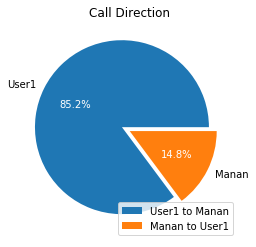

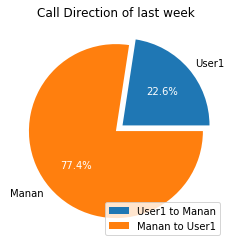

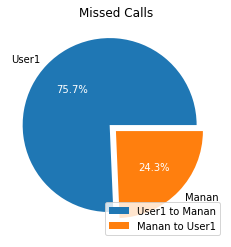

In [25]:
label = [second_person,first_person]
legend = [second_person+" to "+first_person,first_person+" to "+second_person]


title = "Call Direction"
plotPie("1",label,title,legend).show()


title = "Call Direction of last week"
plotPie("1",label,title,legend,getDateTimeObject("27-10-2019 (00:00:00)"),getDateTimeObject("03-11-2019 (00:00:00)")).show()


title = "Missed Calls"
plotPie("2",label,title,legend).show()

In [26]:
# incoming_calls = 0
# outgoing_calls = 0
# for i in df.itertuples(): 
# #     print(i[1])
#     direction = i[3] 
#     if(direction == "Incoming"):
#         incoming_calls+=1
#     elif(direction =="Outgoing"):
#         outgoing_calls+=1
# print("incoming_calls: ",incoming_calls,"outgoing_calls: ",outgoing_calls)

# calling_list = [incoming_calls,outgoing_calls]
# label = [second_person,first_person]
# _,_,autotexts = plt.pie(calling_list,labels=label,explode=[0.1,0],autopct='%1.1f%%')
# for autotext in autotexts:
#     autotext.set_color('white')
# plt.title("Call Direction")
# plt.show()

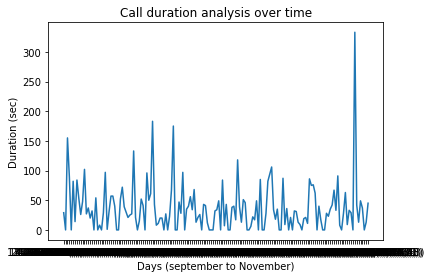

In [27]:
plt.plot(df['Date'],df['Duration_sec'])
plt.xlabel('Days (september to November)')
plt.ylabel('Duration (sec)')
plt.title('Call duration analysis over time')
plt.show()

In [28]:
#Some quick facts
max_call_duration = 0
max_call_duration_date = datetime.datetime.strptime('01-01-1900 01:01:01','%d-%m-%Y %H:%M:%S')
avg_call_duration = 0
total_calls = 0
total_calls_from_person1 = 0
total_calls_from_person2 = 0
call_from_person1_duration = 0
call_from_person2_duration = 0



for i in df.itertuples():
    temp_call_duration = i[7]
    temp_call_duration_date = i[8]
    direction = i[3]
    
    if(temp_call_duration > -1):
        total_calls += 1
        if(direction == "Incoming"):
            total_calls_from_person2 += 1
            call_from_person2_duration += temp_call_duration

        else:
            total_calls_from_person1 += 1
            call_from_person1_duration += temp_call_duration
        if(temp_call_duration >= max_call_duration):
            max_call_duration = temp_call_duration
            max_call_duration_date = temp_call_duration_date 

            
avg_call_duration = (call_from_person1_duration + call_from_person2_duration) / total_calls


print("{0:*^100}".format("Call Analysis between "+first_person+" and "+second_person))
print("Max call duration: "+str(max_call_duration)+" secs on "+str(max_call_duration_date.date()))
print("Calls from "+first_person+": "+str(total_calls_from_person1))
print("Calls from "+second_person+": "+str(total_calls_from_person2))
print("Average call duration: {0:.2f} sec(s)".format(avg_call_duration))


*******************************Call Analysis between Manan and User1********************************
Max call duration: 333 secs on 2019-10-28
Calls from Manan: 24
Calls from User1: 138
Average call duration: 36.41 sec(s)
